**Srujana Dandem**

In the 1980s, the [National Cancer Institute](http://cancer.gov) developed a set of 60 cancer cell lines, called [NCI60](http://www.broadinstitute.org/mpr/NCI60/NCI60.html). The original purpose was for screening potential anti-cancer drugs. Here you will examine gene expression in these cell lines. More than 41,000 probes were used for each of the 60 cell lines. For convenience, the data are provided in `NCI60.csv` and `NCI60cells.csv`.<p/>
`NCI60` is somewhat large -- 41,078 probes by 60 cell lines. Each of these 2,454,680 entries is a measure of how much a particular gene was expressed in one cell line.<p/>
One clue that a gene is linked to cancer is differences in expression of that gene from one cancer type to another. Here's the wrangling involved in extracting the expression of TOP3A for each cell line.


In [1]:
import pandas as pd
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import matplotlib.pyplot as plt
import matplotlib
import plotnine as p9

_Insert a line of code to read NCI60.csv into a dataframe named_ `Narrow`.

In [2]:
Narrow = pd.read_csv("NCI60.csv")

_Insert a line of code to visually inspect or verify the structure and data of_ `Narrow`

In [3]:
Narrow

,i,Probe,BR.MCF7,BR.MDA_MB_231,BR.HS578T,BR.BT_549,BR.T47D,CNS.SF_268,CNS.SF_295,CNS.SF_539,...,PR.PC_3,PR.DU_145,RE.786_0,RE.A498,RE.ACHN,RE.CAKI_1,RE.RXF_393,RE.SN12C,RE.TK_10,RE.UO_31
0,1,AT_D_3,-7.45,-7.51,-7.30,-7.37,-6.15,-7.16,-7.03,-7.44,...,-6.88,-6.78,-7.25,-7.17,-6.51,-6.66,-6.53,-6.86,-7.03,-6.85
1,2,AT_D_5,-7.05,-6.62,-6.88,-6.78,-7.18,-7.25,-7.22,-7.37,...,-6.27,-7.04,-6.68,-6.83,-6.65,-6.61,-6.23,-6.74,-6.85,-6.67
2,3,AT_D_M,-7.05,-7.29,-7.30,-7.37,-7.61,-6.56,-7.63,-7.44,...,-6.45,-7.29,-7.25,-7.14,-6.53,-6.93,-6.17,-7.20,-6.93,-6.85
3,4,AT_L_3,-7.32,-7.01,-7.22,-6.60,-7.45,-7.00,-7.32,-7.27,...,-6.30,-7.01,-6.73,-6.50,-6.37,-6.54,-7.07,-6.86,-6.55,-6.67
4,5,AT_L_5,-7.38,-7.22,-7.30,-7.37,-7.70,-7.25,-7.61,-7.44,...,-6.48,-7.15,-7.06,-6.44,-6.47,-6.62,-7.00,-7.22,-6.89,-6.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41073,41074,RC5,-7.38,-7.51,-6.94,-7.37,-7.74,-7.25,-7.63,-7.44,...,-7.21,-7.00,-7.25,-7.17,-7.13,-7.00,-7.10,-7.22,-7.03,-7.03
41074,41075,RC6,-7.45,-7.51,-7.30,-6.34,-7.74,-7.25,-7.63,-7.44,...,-7.21,-7.30,-7.25,-7.17,-6.41,-7.00,-7.10,-7.21,-6.86,-7.23
41075,41076,RC7,-7.22,-7.51,-7.30,-7.37,-7.74,-7.25,-7.63,-7.44,...,-6.85,-7.30,-6.50,-7.17,-7.07,-6.81,-7.10,-7.18,-6.82,-6.58
41076,41077,RC8,-7.45,-7.51,-7.30,-7.37,-7.74,-7.25,-7.63,-7.44,...,-7.21,-7.22,-7.25,-7.17,-7.11,-6.68,-7.07,-7.21,-7.03,-6.53


_Insert a line of code that will transform_ `Narrow` _from wide to narrow format. Use_ `Probe` _as the identifier variable._

In [4]:
Narrow = pd.melt(Narrow, id_vars='Probe')

_Insert a line of code to verify the structure and data of_ `Narrow`

In [5]:
Narrow

,Probe,variable,value
0,AT_D_3,i,1.00
1,AT_D_5,i,2.00
2,AT_D_M,i,3.00
3,AT_L_3,i,4.00
4,AT_L_5,i,5.00
...,...,...,...
2505753,RC5,RE.UO_31,-7.03
2505754,RC6,RE.UO_31,-7.23
2505755,RC7,RE.UO_31,-6.58
2505756,RC8,RE.UO_31,-6.53


_Insert a line of code to read_ `NCI60cells.csv` _into the variable_ `CellTypes`. We're only interested in the `cellLine` and `tissue` columns. Both of these operations could happen in one line, or two.

In [6]:
CellTypes = pd.read_csv("NCI60cells.csv")
CellTypes = CellTypes[['cellLine', 'tissue']]

_Insert a line of code to verify the structure and data of_ `CellTypes`

In [7]:
CellTypes

,cellLine,tissue
0,BR:MCF7,Breast
1,BR:MDA_MB_231,Breast
2,BR:HS578T,Breast
3,BR:BT_549,Breast
4,BR:T47D,Breast
5,CNS:SF_268,CNS
6,CNS:SF_295,CNS
7,CNS:SF_539,CNS
8,CNS:SNB_19,CNS
9,CNS:SNB_75,CNS


_Notice how the cellLine names in this file use_ `:` _rather than_ `.` _We need to fix this. Update the contents of_ `cellLine` _to replace_ `:` _with_ `.` _using_ `str.replace`. _You will likely need to escape the_ `:`. 

In [8]:
CellTypes["cellLine"] = CellTypes["cellLine"].str.replace(":", '.')

_Insert a line of code to verify the structure and data of_ `CellTypes`

In [9]:
CellTypes

,cellLine,tissue
0,BR.MCF7,Breast
1,BR.MDA_MB_231,Breast
2,BR.HS578T,Breast
3,BR.BT_549,Breast
4,BR.T47D,Breast
5,CNS.SF_268,CNS
6,CNS.SF_295,CNS
7,CNS.SF_539,CNS
8,CNS.SNB_19,CNS
9,CNS.SNB_75,CNS


_Write a line of code to join the data in_ `Narrow` _and_ `CellTypes`_, storing the result back into_ `Narrow`. _You should be able to mostly match the figure below. It's OK if your column names are different, as long as you are consistent!_

In [10]:
Narrow = Narrow.rename(
    columns={"variable":"cellLine"})

Narrow = pd.merge(Narrow, CellTypes, on = "cellLine")

_Write a line of code to verify the structure and data in_ `Narrow`.

In [11]:
Narrow

,Probe,cellLine,value,tissue
0,AT_D_3,BR.MCF7,-7.45,Breast
1,AT_D_5,BR.MCF7,-7.05,Breast
2,AT_D_M,BR.MCF7,-7.05,Breast
3,AT_L_3,BR.MCF7,-7.32,Breast
4,AT_L_5,BR.MCF7,-7.38,Breast
...,...,...,...,...
2464675,RC5,RE.UO_31,-7.03,Renal
2464676,RC6,RE.UO_31,-7.23,Renal
2464677,RC7,RE.UO_31,-6.58,Renal
2464678,RC8,RE.UO_31,-6.53,Renal


![Table 1](Final/T1.png "Table 1")

_Insert a line of code to extract those rows from_ `Narrow` _corresponding to the Probe_ `TOP3A`_, storing the result into a variable named_ `Probe_TOP3A`

In [12]:
Probe_TOP3A = Narrow[Narrow["Probe"]=="TOP3A"]

_Write a line of code to verify the structure and data of_ `Probe_TOP3A`.

In [13]:
Probe_TOP3A

,Probe,cellLine,value,tissue
4688,TOP3A,BR.MCF7,-0.37,Breast
45766,TOP3A,BR.MDA_MB_231,-0.18,Breast
86844,TOP3A,BR.HS578T,0.32,Breast
127922,TOP3A,BR.BT_549,0.05,Breast
169000,TOP3A,BR.T47D,-0.31,Breast
210078,TOP3A,CNS.SF_268,-0.13,CNS
251156,TOP3A,CNS.SF_295,-0.81,CNS
292234,TOP3A,CNS.SF_539,-0.57,CNS
333312,TOP3A,CNS.SNB_19,-0.58,CNS
374390,TOP3A,CNS.SNB_75,-0.88,CNS


_If you have made it this far, your data in_ `Probe_TOP3A` _should resemble Table 2. It's OK to have more columns or for the columns to have different names._
![Table 2](Final/T2.png "Table 2")

_Create a new dataframe named_ `SummaryStats` _that contains the mean, standard deviation and count of the expression data **in each cancer tissue type**._

In [14]:
Table_A = Probe_TOP3A.groupby("tissue")
SummaryStats = Table_A['value']
SummaryStats= SummaryStats.agg(['mean', 'std', 'count'])
SummaryStats

,mean,std,count
tissue,,,
Breast,-0.098000,0.283849,5
CNS,-0.643333,0.288975,6
Colon,-1.037143,0.406354,7
Leukemia,-0.416667,0.624617,6
Melanoma,-0.557000,0.311129,10
Non-Small Cell Lung,-0.925556,0.805623,9
Ovarian,-1.027143,0.407256,7
Prostate,-0.980000,0.438406,2
Renal,-0.740000,0.707410,8


_We need to convert the mean expression data using numpy's_ `exp` _function. Be sure that the standard deviation and count values are **not** converted!_ <p/>

_Create a new column named_ `se` _that represents the standard error. The standard error is calculated as_
\begin{equation*}
\frac{standard\ deviation}{\sqrt {count}}
\end{equation*}
_for each group. This value will be used to calculate the error bars later._

In [15]:
SummaryStats["mean"] = np.exp(SummaryStats["mean"])
SummaryStats['se'] = SummaryStats['std']/np.sqrt(SummaryStats['count'])
SummaryStats

,mean,std,count,se
tissue,,,,
Breast,0.906649,0.283849,5,0.126941
CNS,0.525538,0.288975,6,0.117974
Colon,0.354466,0.406354,7,0.153587
Leukemia,0.659241,0.624617,6,0.254999
Melanoma,0.572925,0.311129,10,0.098388
Non-Small Cell Lung,0.396311,0.805623,9,0.268541
Ovarian,0.358028,0.407256,7,0.153928
Prostate,0.375311,0.438406,2,0.310000
Renal,0.477114,0.707410,8,0.250107


_Insert a line of code to verify the structure and data in_ `SummaryStats`. _It should resemble the table below (ours will be slightly different in that we're including standard deviation values). You will also see that_ `tissue` _became an index during our aggregation. Remove it as an index so that we have_ `tissue` _available to graph._

In [16]:
SummaryStats_B = SummaryStats.reset_index()
SummaryStats_B

,tissue,mean,std,count,se
0,Breast,0.906649,0.283849,5,0.126941
1,CNS,0.525538,0.288975,6,0.117974
2,Colon,0.354466,0.406354,7,0.153587
3,Leukemia,0.659241,0.624617,6,0.254999
4,Melanoma,0.572925,0.311129,10,0.098388
5,Non-Small Cell Lung,0.396311,0.805623,9,0.268541
6,Ovarian,0.358028,0.407256,7,0.153928
7,Prostate,0.375311,0.438406,2,0.310000
8,Renal,0.477114,0.707410,8,0.250107


![Table 3](Final/T3.png "Table 3")

The figure below shows the mean expression data graphically. This sort of bar graph is often seen in the scientific literature, but that does not mean it is an effective presentation.

![Figure 1](Final/F1.png "Figure 1")

_Insert code to generate a similar bar graph of mean gene expression from the_ `SummaryStats` _data frame._

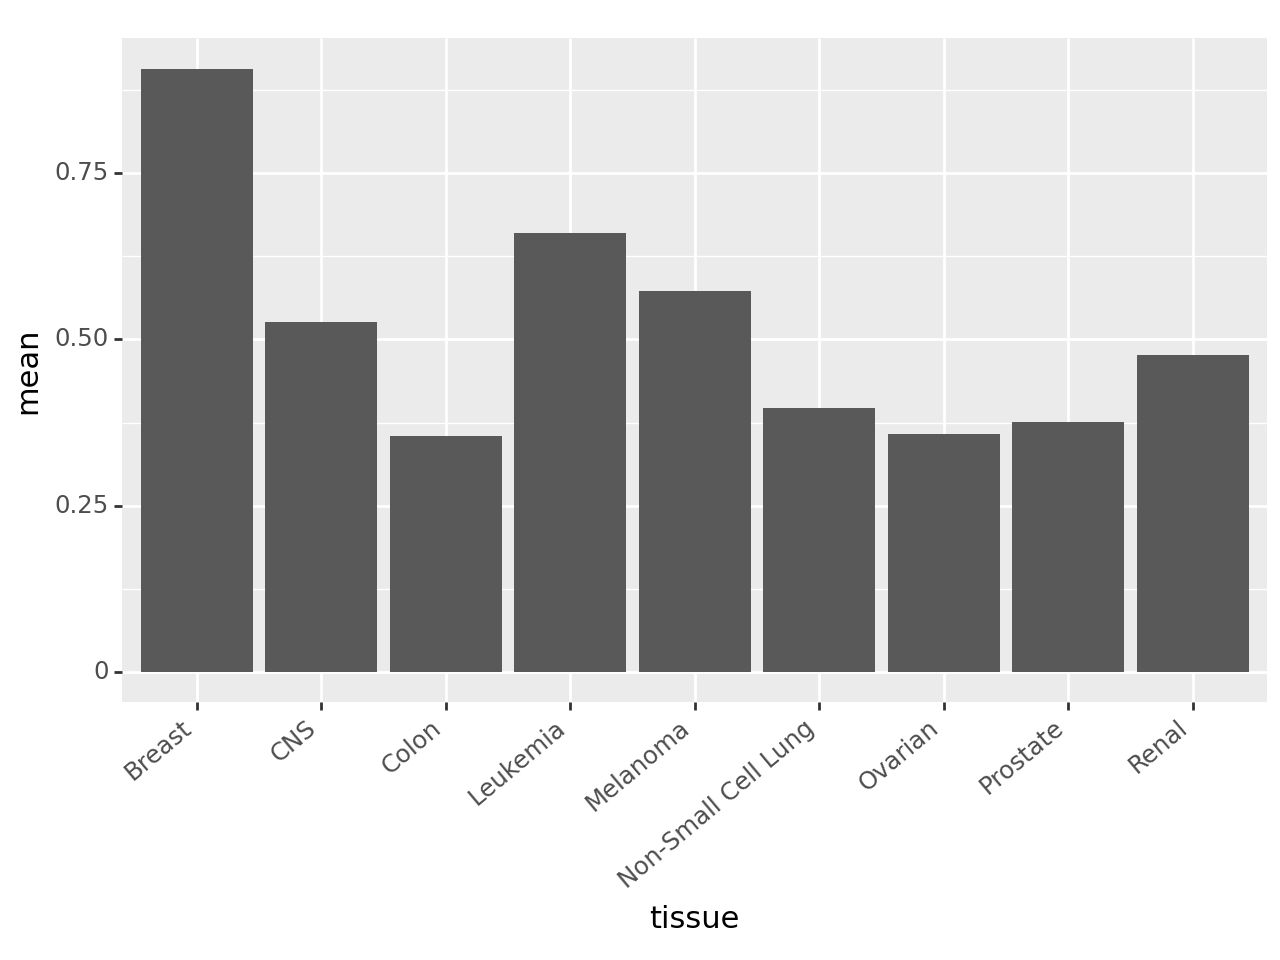

<Figure Size: (640 x 480)>

In [17]:
(p9.ggplot(data = SummaryStats_B)+
 p9.aes(x = 'tissue', y= 'mean')+
 p9.xlab("tissue")+ p9.ylab("mean")+
 p9.geom_bar(stat="identity")+
 p9.theme(axis_text_x=p9.element_text(rotation=40, hjust=1)))

To judge from the figure, `TOP3A` is expressed more highly in breast cancer than in other cancer tissue types. <p/>
But don't jump to conclusions! Expression differs even from one cell line to another of the same tissue type, as in the next figure.
![Figure 2](Final/F2.png "Figure 2")
_Insert code below to do two things._
* _We want to plot the_ `Probe_TOP3A` _mean expression data by tissue type. To do this, you'll need to convert the gene expression data in_ `Probe_TOP3A` _with_ `np.exp`.
* _Plot your data like the example figure._

In [18]:
Probe_TOP3A = Probe_TOP3A.rename(
    columns={"value":"expression"})
Probe_TOP3A["expression_B"] = np.exp(Probe_TOP3A["expression"])
Probe_TOP3A

,Probe,cellLine,expression,tissue,expression_B
4688,TOP3A,BR.MCF7,-0.37,Breast,0.690734
45766,TOP3A,BR.MDA_MB_231,-0.18,Breast,0.835270
86844,TOP3A,BR.HS578T,0.32,Breast,1.377128
127922,TOP3A,BR.BT_549,0.05,Breast,1.051271
169000,TOP3A,BR.T47D,-0.31,Breast,0.733447
210078,TOP3A,CNS.SF_268,-0.13,CNS,0.878095
251156,TOP3A,CNS.SF_295,-0.81,CNS,0.444858
292234,TOP3A,CNS.SF_539,-0.57,CNS,0.565525
333312,TOP3A,CNS.SNB_19,-0.58,CNS,0.559898
374390,TOP3A,CNS.SNB_75,-0.88,CNS,0.414783


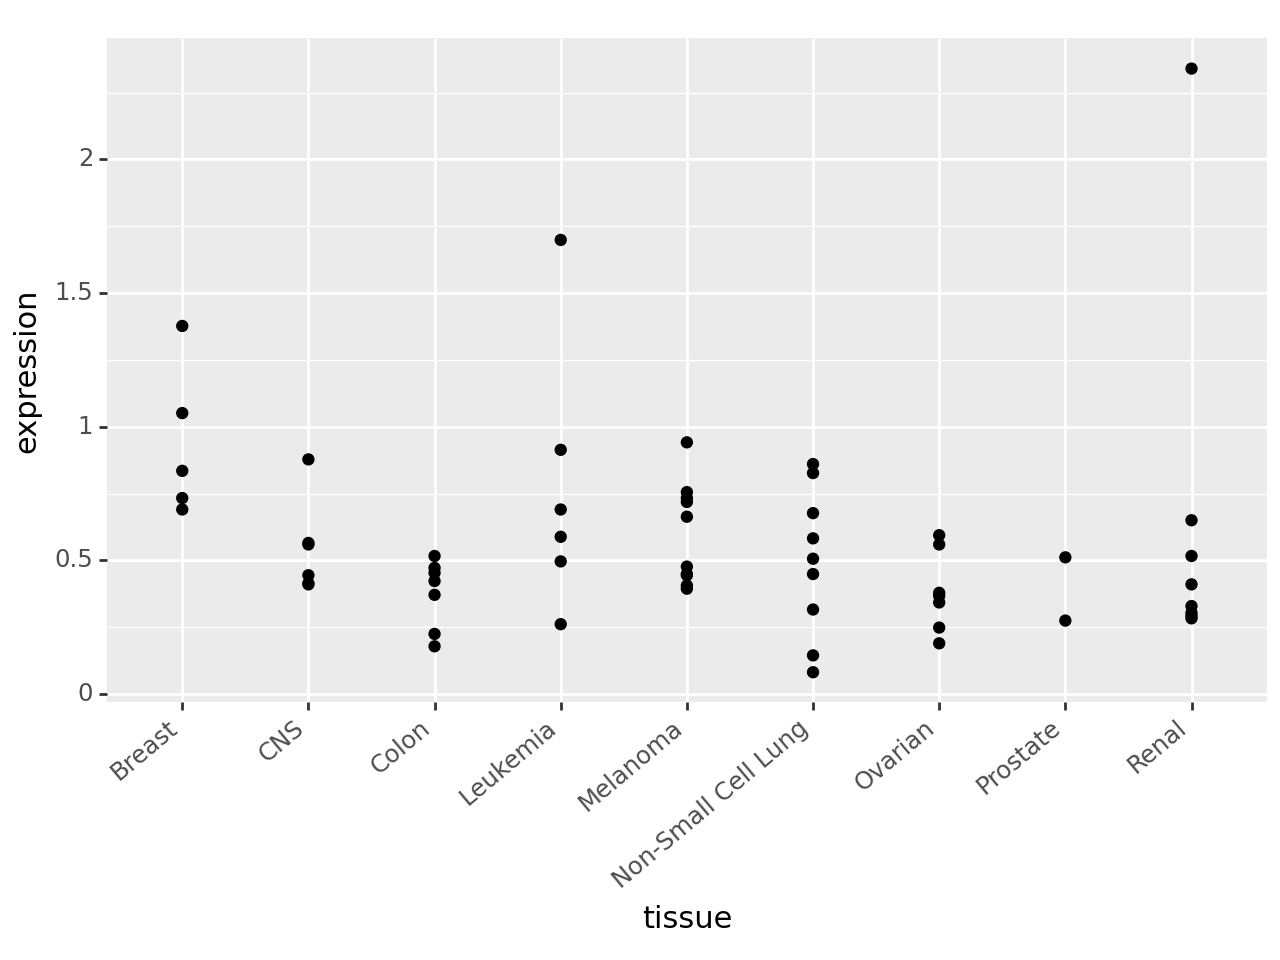

<Figure Size: (640 x 480)>

In [19]:
(p9.ggplot(data= Probe_TOP3A)+
 p9.aes(x = "tissue", y = "expression_B")+
 p9.xlab("tissue")+ p9.ylab("expression")+
 p9.geom_point()+
 p9.theme(axis_text_x=p9.element_text(rotation=40, hjust=1)))  

When looking at the individual cell lines, it's not so clear that `TOP3A` is expressed differently in breast cancer compared to the others.<p/>
The mean reflects the `Top3A` expression collectively within each tissue type. As such, the mean is a **statistic** (a calculated quantity giving a collective property for a set of cases). In order to compare different tissues to one another, some indication must be given for the precision of the mean. Clasically, this indication is provided by a **confidence interval** at the 95-percent level.<p/>
Write code to produce error bars on the plotted data. The tops and bottoms of the error bars should be two standard errors above and below the mean for each tissue. Your graph should look something like below. You will need to combine the data for `Top3A` with standard errors for the various tissues, somehow.<p/>
The 'secret sauce' to make this work in `matplotlib`'s `plt.errorbar`, which takes a number of parameters, including the `x` and `y` values (use the `mean` here), how far to extend the error bar (`standard error` * 2), and include `capsize=5, ls='none'` to put the horizontal lines on the ends of the error bars and to _not_ connect the data with a best-fit line.<p/>
Similarly, when using `plotnine`, calculate and use the `ymin` and `ymax` values for `geom_errorbar`.
![Figure 5](Final/F5.png "Figure 5")

In [20]:
SummaryStats_B ["MinY"]= SummaryStats_B["mean"]-2*SummaryStats_B['se']
SummaryStats_B ["MaxY"]= SummaryStats_B["mean"]+2*SummaryStats_B['se']
SummaryStats_B

,tissue,mean,std,count,se,MinY,MaxY
0,Breast,0.906649,0.283849,5,0.126941,0.652767,1.160531
1,CNS,0.525538,0.288975,6,0.117974,0.289590,0.761485
2,Colon,0.354466,0.406354,7,0.153587,0.047291,0.661641
3,Leukemia,0.659241,0.624617,6,0.254999,0.149243,1.169238
4,Melanoma,0.572925,0.311129,10,0.098388,0.376150,0.769700
5,Non-Small Cell Lung,0.396311,0.805623,9,0.268541,-0.140771,0.933393
6,Ovarian,0.358028,0.407256,7,0.153928,0.050172,0.665885
7,Prostate,0.375311,0.438406,2,0.310000,-0.244689,0.995311
8,Renal,0.477114,0.707410,8,0.250107,-0.023100,0.977328


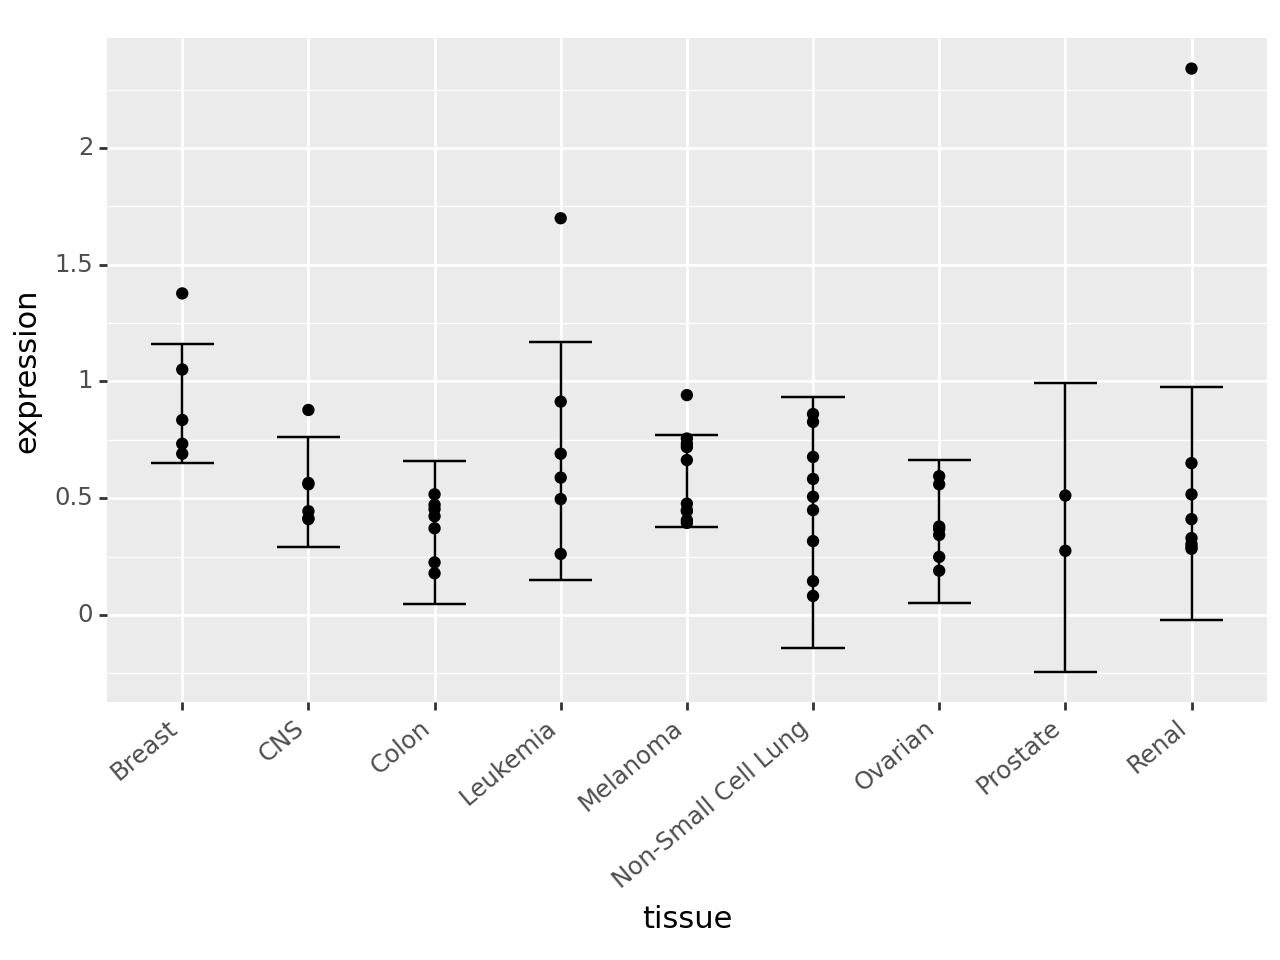

<Figure Size: (640 x 480)>

In [21]:

(p9.ggplot()+
 p9.xlab("tissue")+ p9.ylab("expression")+
 p9.geom_point(data= Probe_TOP3A, mapping = p9.aes(x = "tissue", y = "expression_B"))+
 p9.geom_errorbar(data = SummaryStats_B, mapping = p9.aes(x='tissue', ymin = 'MinY', ymax= 'MaxY'))+
 p9.theme(axis_text_x=p9.element_text(rotation=40, hjust=1)))  
 

There are 32,344 distinct probes in `NCI60`. `TOP3A` in the above example was selected literally at random. Repeat the above analysis with a different probe (I'd recommend A_23_P61317, A_24_P190631, or A_23_P135646 -- sadly, this term we've run out of time to discover why!). Your goal is to create a graph for this probe like we just did with the error bars.

In [22]:
n = Narrow.groupby('Probe')
n.first(15)

,value
Probe,
3.8-1,-7.45
7A5,-4.63
A1BG,0.94
A2BP1,-7.41
A2M,-7.12
...,...
hCG_32481,-0.85
hCG_401283,-1.03
tAKR,-6.91


In [23]:
ProbeA_23 = Narrow[Narrow["Probe"]=="A_23_P61317"]
ProbeA_23

,Probe,cellLine,value,tissue
15737,A_23_P61317,BR.MCF7,-7.45,Breast
56815,A_23_P61317,BR.MDA_MB_231,-7.51,Breast
97893,A_23_P61317,BR.HS578T,-7.30,Breast
138971,A_23_P61317,BR.BT_549,-7.37,Breast
180049,A_23_P61317,BR.T47D,-7.74,Breast
221127,A_23_P61317,CNS.SF_268,-7.25,CNS
262205,A_23_P61317,CNS.SF_295,-7.63,CNS
303283,A_23_P61317,CNS.SF_539,-7.44,CNS
344361,A_23_P61317,CNS.SNB_19,-7.43,CNS
385439,A_23_P61317,CNS.SNB_75,-7.65,CNS


,mean,std,count
tissue,,,
Breast,-7.474000,0.168612,5
CNS,-7.493333,0.150820,6
Colon,-7.132857,0.316529,7
Leukemia,-7.161667,0.194465,6
Melanoma,-7.251000,0.166430,10
Non-Small Cell Lung,-7.318889,0.123940,9
Ovarian,-7.030000,0.277789,7
Prostate,-1.485000,0.502046,2
Renal,-7.162500,0.122562,8


,mean,std,count,se
tissue,,,,
Breast,0.000568,0.168612,5,0.075406
CNS,0.000557,0.150820,6,0.061572
Colon,0.000798,0.316529,7,0.119637
Leukemia,0.000776,0.194465,6,0.079390
Melanoma,0.000709,0.166430,10,0.052630
Non-Small Cell Lung,0.000663,0.123940,9,0.041313
Ovarian,0.000885,0.277789,7,0.104994
Prostate,0.226502,0.502046,2,0.355000
Renal,0.000775,0.122562,8,0.043332


,tissue,mean,std,count,se
0,Breast,0.000568,0.168612,5,0.075406
1,CNS,0.000557,0.150820,6,0.061572
2,Colon,0.000798,0.316529,7,0.119637
3,Leukemia,0.000776,0.194465,6,0.079390
4,Melanoma,0.000709,0.166430,10,0.052630
5,Non-Small Cell Lung,0.000663,0.123940,9,0.041313
6,Ovarian,0.000885,0.277789,7,0.104994
7,Prostate,0.226502,0.502046,2,0.355000
8,Renal,0.000775,0.122562,8,0.043332


,Probe,cellLine,expression,tissue,expression_B
15737,A_23_P61317,BR.MCF7,-7.45,Breast,0.000581
56815,A_23_P61317,BR.MDA_MB_231,-7.51,Breast,0.000548
97893,A_23_P61317,BR.HS578T,-7.30,Breast,0.000676
138971,A_23_P61317,BR.BT_549,-7.37,Breast,0.000630
180049,A_23_P61317,BR.T47D,-7.74,Breast,0.000435
221127,A_23_P61317,CNS.SF_268,-7.25,CNS,0.000710
262205,A_23_P61317,CNS.SF_295,-7.63,CNS,0.000486
303283,A_23_P61317,CNS.SF_539,-7.44,CNS,0.000587
344361,A_23_P61317,CNS.SNB_19,-7.43,CNS,0.000593
385439,A_23_P61317,CNS.SNB_75,-7.65,CNS,0.000476


,tissue,mean,std,count,se,MinY,MaxY
0,Breast,0.000568,0.168612,5,0.075406,-0.150243,0.151379
1,CNS,0.000557,0.150820,6,0.061572,-0.122587,0.123701
2,Colon,0.000798,0.316529,7,0.119637,-0.238475,0.240072
3,Leukemia,0.000776,0.194465,6,0.079390,-0.158004,0.159556
4,Melanoma,0.000709,0.166430,10,0.052630,-0.104550,0.105969
5,Non-Small Cell Lung,0.000663,0.123940,9,0.041313,-0.081964,0.083290
6,Ovarian,0.000885,0.277789,7,0.104994,-0.209104,0.210874
7,Prostate,0.226502,0.502046,2,0.355000,-0.483498,0.936502
8,Renal,0.000775,0.122562,8,0.043332,-0.085889,0.087439


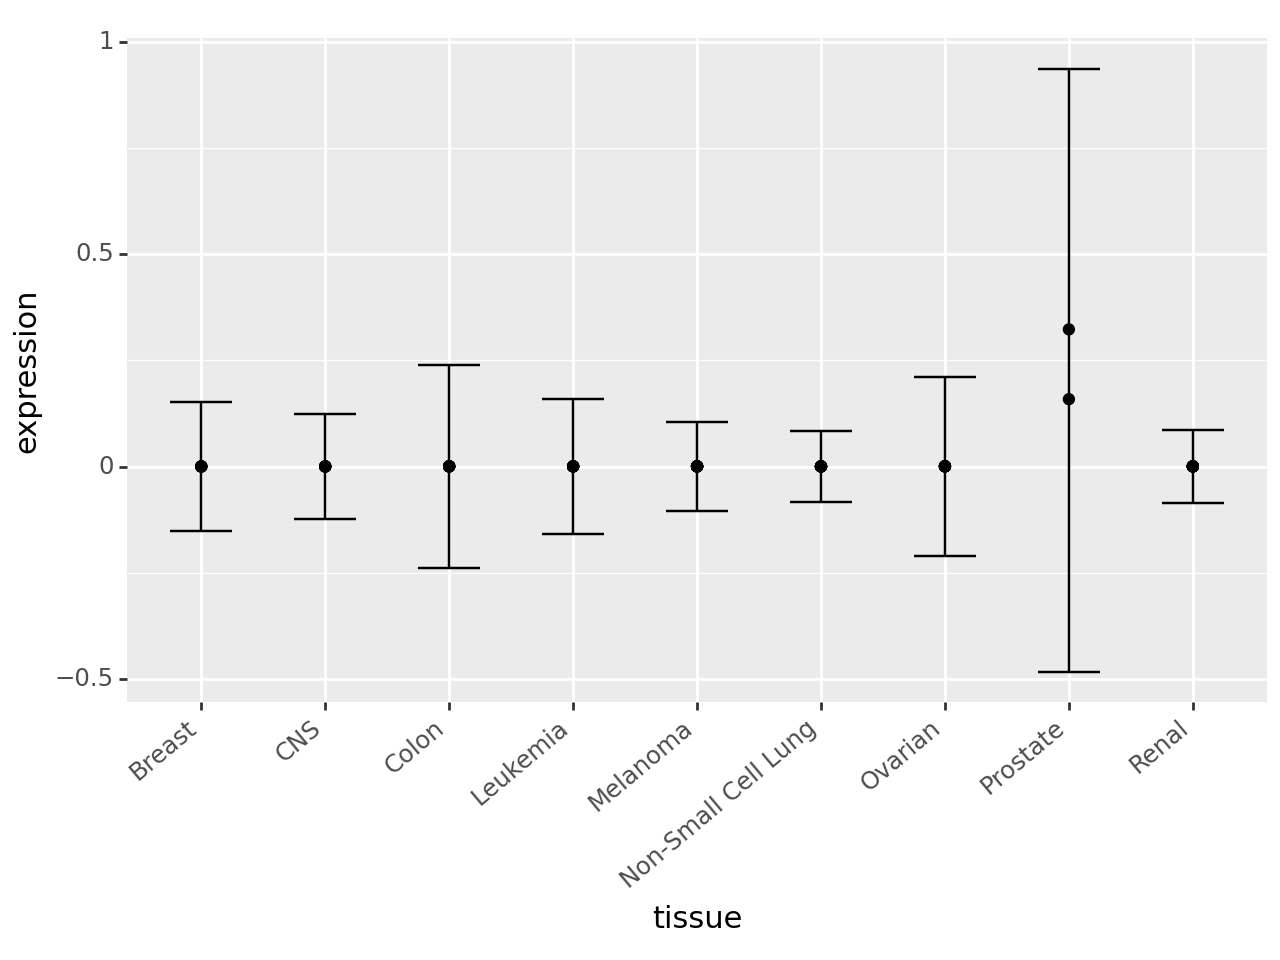

<Figure Size: (640 x 480)>

In [24]:
 
Table_A = ProbeA_23.groupby("tissue")
SummaryStats = Table_A['value']
SummaryStats= SummaryStats.agg(['mean', 'std', 'count'])
SummaryStats

SummaryStats["mean"] = np.exp(SummaryStats["mean"])
SummaryStats['se'] = SummaryStats['std']/np.sqrt(SummaryStats['count'])
SummaryStats

SummaryStats_B = SummaryStats.reset_index()
SummaryStats_B
 
ProbeA_23 = ProbeA_23.rename(
    columns={"value":"expression"})
ProbeA_23["expression_B"] = np.exp(ProbeA_23["expression"])
ProbeA_23


SummaryStats_B ["MinY"]= SummaryStats_B["mean"]-2*SummaryStats_B['se']
SummaryStats_B ["MaxY"]= SummaryStats_B["mean"]+2*SummaryStats_B['se']
SummaryStats_B


(p9.ggplot()+
 p9.xlab("tissue")+ p9.ylab("expression")+
 p9.geom_point(data= ProbeA_23, mapping = p9.aes(x = "tissue", y = "expression_B"))+
 p9.geom_errorbar(data = SummaryStats_B, mapping = p9.aes(x='tissue', ymin = 'MinY', ymax= 'MaxY'))+
 p9.theme(axis_text_x=p9.element_text(rotation=40, hjust=1)))  
 